In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
fichiers = os.listdir('../bin/data/')
fichiers

['donnees_simulation_replication_50.csv',
 'donnees_simulation_replication_6.csv',
 'donnees_simulation_replication_26.csv',
 'donnees_simulation_replication_7.csv',
 'donnees_simulation_replication_42.csv',
 'donnees_simulation_replication_11.csv',
 'donnees_simulation_replication_86.csv',
 'donnees_simulation_replication_83.csv',
 'donnees_simulation_replication_58.csv',
 'donnees_simulation_replication_23.csv',
 'donnees_simulation_replication_82.csv',
 'donnees_simulation_replication_22.csv',
 'donnees_simulation_replication_74.csv',
 'donnees_simulation_replication_20.csv',
 'donnees_simulation_replication_92.csv',
 'donnees_simulation_replication_65.csv',
 'donnees_simulation_replication_44.csv',
 'donnees_simulation_replication_38.csv',
 'donnees_simulation_replication_29.csv',
 'donnees_simulation_replication_97.csv',
 'donnees_simulation_replication_64.csv',
 'donnees_simulation_replication_93.csv',
 'donnees_simulation_replication_75.csv',
 'donnees_simulation_replication_95.

In [3]:
# Lecture de chaque fichiers et les stocker dans une liste
data = []
for fic in fichiers :
    df = pd.read_csv('../bin/data/' + fic)
    data.append(df)


In [4]:
"""
- Enlever la colonne jour car c'est une repetition de la colonne d'indice
- Vérifer que la somme des individus est égale à 20000
"""
for replication in data :
    replication.drop(['Jour'], axis=1, inplace=True)
    replication['Somme'] = replication.sum(axis=1)
    boolean = True
    if (replication['Somme'].eq(20000).all() == False) : #Pour verifier si pour toutes les replications, la somme des individus égale à 20000
        boolean = False

"""
- Faire la moyenne des touts les fichiers et la stocker dans `moyenne`
- Calculer le pourcetage des populations et le stocker dans `pourcentage`
"""
if boolean :
    moyenne = 0
    for replication in data :
        moyenne += replication
    moyenne /= len(data)
    pourcentage = moyenne[['Susceptible', 'Exposed', 'Infected', 'recovered']].div(moyenne['Somme'], axis=0)



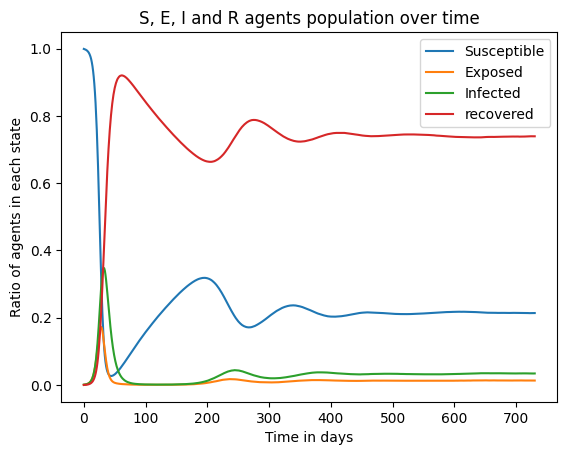

In [5]:
pourcentage['Susceptible'].plot()
pourcentage['Exposed'].plot()
pourcentage['Infected'].plot()
pourcentage['recovered'].plot()
plt.title("S, E, I and R agents population over time")
plt.xlabel("Time in days")
plt.ylabel("Ratio of agents in each state")
plt.legend()
plt.show()